In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results, parse_JBiclustGE
from find_optimal_parameters import  plot_F1_heatmap,get_opt_params, F1_per_bic

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../JbiclustGE/simulated_data/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "COALESCE"
tool_suffix = "COALESCE"
n_runs = 10

parameters = (("prob_gene",[0.99, 0.95, 0.9]),
              ("pvalue_cond",[0.01, 0.05, 0.1]),
              ("pvalue_correl",[0.01, 0.05, 0.1]),
              ("zscore_cond",[0.01, 0.05, 0.1])) 

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap

img_outdir = "../simulated_datasets/results/F1/img"
tsv_outdir = "../simulated_datasets/results/F1/"



In [9]:
results= read_all_results(parameters,tool_name,n_runs=n_runs, parse_biclust_func=parse_JBiclustGE,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix,
                          param_folder_delim=",")
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 81
	files not found: 0
	files empty: 0
	failed to parse: 0
Total runs 16200
Non-zero runs: 13770


In [10]:
results.head(20)

,F1 per best match,F1 per bicluster,n_biclusters,n_genes,n_run,n_samples,prob_gene,pvalue_cond,pvalue_correl,zscore_cond
0,0.0,0.0,10,5,1,10,0.99,0.01,0.01,0.01
1,0.0,0.0,10,5,2,10,0.99,0.01,0.01,0.01
2,0.0,0.0,10,5,3,10,0.99,0.01,0.01,0.01
3,0.0,0.0,10,5,4,10,0.99,0.01,0.01,0.01
4,0.0,0.0,10,5,5,10,0.99,0.01,0.01,0.01
5,0.0,0.0,10,5,6,10,0.99,0.01,0.01,0.01
6,0.0,0.0,10,5,7,10,0.99,0.01,0.01,0.01
7,0.0,0.0,10,5,8,10,0.99,0.01,0.01,0.01
8,0.0,0.0,10,5,9,10,0.99,0.01,0.01,0.01
9,0.0,0.0,10,5,10,10,0.99,0.01,0.01,0.01


In [11]:
parameters

(('prob_gene', [0.99, 0.95, 0.9]),
 ('pvalue_cond', [0.01, 0.05, 0.1]),
 ('pvalue_correl', [0.01, 0.05, 0.1]),
 ('zscore_cond', [0.01, 0.05, 0.1]))

Total combinations: 81
Total combinations: 81
Combinations with mean F1 > 0.1 81


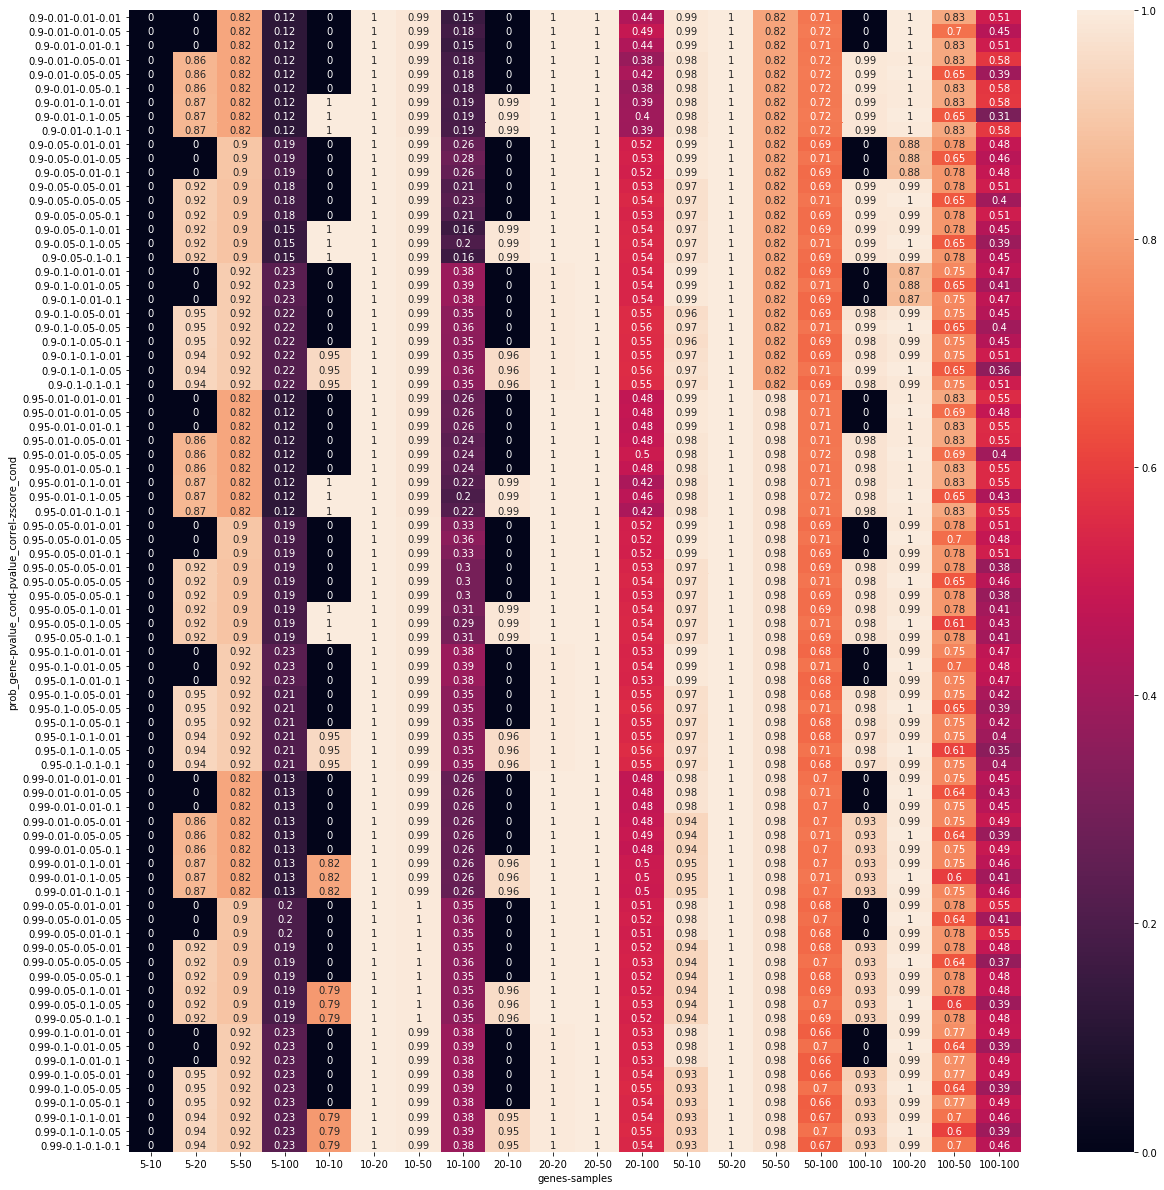

In [12]:
params = ["prob_gene","pvalue_cond","pvalue_correl","zscore_cond"]
plot_file = img_outdir+"/" + tool_suffix+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.1,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [13]:
parameters

(('prob_gene', [0.99, 0.95, 0.9]),
 ('pvalue_cond', [0.01, 0.05, 0.1]),
 ('pvalue_correl', [0.01, 0.05, 0.1]),
 ('zscore_cond', [0.01, 0.05, 0.1]))

In [14]:
default_params = (0.95,0.05,0.05,0.05)

In [16]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 16200 runs considered

Optimal parameters (max. avg. F1 per bicluster):
	prob_gene=0.95;
	pvalue_cond=0.05;
	pvalue_correl=0.1;
	zscore_cond=0.01;
	Max. avg. F1 per bicluster:0.781±0.31
	avg. F1 per best match:0.604±0.409
	biclusters per run:9.8±3.2
With default parameters:
	prob_gene=0.95;
	pvalue_cond=0.05;
	pvalue_correl=0.05;
	zscore_cond=0.05;
	avg. F1 per bicluster:0.679±0.376
	avg. F1 per best match:0.622±0.406
	biclusters per run:10.5±2.2


F1 per bicluster            \
                                                            mean       std   
prob_gene pvalue_cond pvalue_correl zscore_cond                              
0.95      0.05        0.10          0.01                0.781373  0.309602   
                                    0.10                0.781373  0.309602   
          0.10        0.10          0.10                0.779850  0.302888   
                                    0.01                0.779850  0.302888   
0.90      0.10        0.10          0.01                0.778916  0.292875   
                                    0.10                0.778916  0.292875   
0.95      0.05        0.10          0.05                0.774027  0.312014   
          0.10        0.10          0.05                0.773362  0.308211   
          0.01        0.10          0.01                0.772326  0.320725   
                                    0.10                0.772326  0.320725   
0.99      0.05        0.10          0.01                0.771165  0.295274   
                                    0.10                0.771165  0.295274   
          0.10        0.10          0.01                0.769983  0.290252   
                                    0.10                0.769983  0.290252   
0.90      0.10        0.10          0.05                0.768964  0.302858   
          0.05        0.10          0.01                0.766597  0.320644   
                                    0.10                0.766597  0.320644   
0.99      0.10        0.10          0.05                0.764524  0.295817   
0.90      0.01        0.10          0.10                0.763552  0.320802   
                                    0.01                0.763552  0.320802   
          0.05        0.10          0.05                0.760734  0.320856   
0.99      0.05        0.10          0.05                0.759473  0.302067   
0.95      0.01        0.10          0.05                0.758281  0.326783   
0.99      0.01        0.10          0.10                0.755754  0.309089   
                                    0.01                0.755754  0.309089   
                                    0.05                0.746577  0.313336   
0.90      0.01        0.10          0.05                0.741285  0.334397   
0.99      0.10        0.05          0.01                0.687869  0.366977   
                                    0.10                0.687869  0.366977   
0.95      0.10        0.05          0.10                0.685701  0.374392   
...                                                          ...       ...   
0.90      0.01        0.05          0.01                0.662755  0.383368   
0.99      0.01        0.05          0.05                0.657808  0.379302   
0.90      0.01        0.05          0.05                0.647202  0.384107   
0.99      0.10        0.01          0.10                0.596082  0.410932   
                                    0.01                0.596082  0.410932   
          0.05        0.01          0.10                0.595753  0.413115   
                                    0.01                0.595753  0.413115   
0.95      0.10        0.01          0.05                0.595741  0.410845   
                                    0.10                0.595661  0.411230   
                                    0.01                0.595661  0.411230   
          0.05        0.01          0.10                0.593451  0.414992   
                                    0.01                0.593451  0.414992   
                                    0.05                0.590350  0.413372   
0.99      0.10        0.01          0.05                0.587656  0.411623   
0.95      0.01        0.01          0.01                0.585903  0.420372   
                                    0.10                0.585903  0.420372   
0.99      0.05        0.01          0.05                0.583351  0.413365   
0.90      0.10        0.01          0.01                0.582274  0.40